In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics

In [2]:
df= pd.read_csv("onlinedeliverydata.csv")
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,...,Important,Important,Important,Important,Important,Important,Important,Important,Yes,Nil
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,...,Moderately Important,Very Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Very Important,Very Important,Yes,Nil
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,...,Important,Very Important,Important,Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,...,Important,Very Important,Important,Very Important,Very Important,Important,Very Important,Very Important,Yes,Language barrier is also one major issue. Mosl...


In [3]:
#Shape of the dataset
print("Dimensions of the dataset(row,col): ",df.shape, " \n\n")

# Printing the column names:
print(df.columns)

Dimensions of the dataset(row,col):  (388, 55)  


Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time

In [4]:
#replacing missing/no reviews to NaN
missing_values = ["nil","NIL","Nil","NA","na","n/a","-","NiL","Nill","nill","N0","NiI","No Comments!","None","NiII","Nil\n"]
df = pd.read_csv("onlinedeliverydata.csv",na_values = missing_values)
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,NaN
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,NaN
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,NaN
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,...,Important,Important,Important,Important,Important,Important,Important,Important,Yes,NaN
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,...,Moderately Important,Very Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Very Important,Very Important,Yes,NaN
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,...,Important,Very Important,Important,Important,Very Important,Very Important,Very Important,Very Important,Yes,NaN
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,...,Important,Very Important,Important,Very Important,Very Important,Important,Very Important,Very Important,Yes,Language barrier is also one major issue. Mosl...


In [5]:
#Number of null rows in 'reviews' column
df['Reviews'].isnull().sum()

147

In [6]:
#Number of Null values in each column
df.isnull().sum()

Age                                            0
Gender                                         0
Marital Status                                 0
Occupation                                     0
Monthly Income                                 0
Educational Qualifications                     0
Family size                                    0
latitude                                       0
longitude                                      0
Pin code                                       0
Medium (P1)                                    0
Medium (P2)                                    0
Meal(P1)                                       0
Meal(P2)                                       0
Perference(P1)                                 0
Perference(P2)                                 0
Ease and convenient                            0
Time saving                                    0
More restaurant choices                        0
Easy Payment option                            0
More Offers and Disc

In [7]:
#Replacing Null values in 'reviews' column with 'Not specified'
df['Reviews'].fillna('Not Specified',inplace=True)
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Not Specified
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Not Specified
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,Not Specified
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,Not Specified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,...,Important,Important,Important,Important,Important,Important,Important,Important,Yes,Not Specified
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,...,Moderately Important,Very Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Very Important,Very Important,Yes,Not Specified
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,...,Important,Very Important,Important,Important,Very Important,Very Important,Very Important,Very Important,Yes,Not Specified
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,...,Important,Very Important,Important,Very Important,Very Important,Important,Very Important,Very Important,Yes,Language barrier is also one major issue. Mosl...


In [8]:
#These values need to be binned to give a clear picture of the analysis.
df['Age_group'] = pd.cut(df['Age'],bins = [15,20,25,30,35,40], labels = ['15-20y','20-25y','25-30y','30-35y','35-40y'])
df["Age_group"].value_counts()

20-25y    255
25-30y     94
30-35y     25
15-20y     14
35-40y      0
Name: Age_group, dtype: int64

It can be seen that the age group of 20-25 orders food online the most.

<AxesSubplot:>

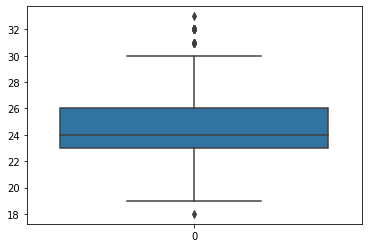

In [9]:
#Outlier analysis for 'Age' column
import seaborn as sns
sns.boxplot(df['Age'])
#Ages above 30 and below 19 are acting as outliers

The other columns do not contain any outliers

In [10]:
#removing attributes that are irrelevant to the problem statement
df.drop(['latitude', 'longitude', 'Pin code', 'Reviews'], axis=1, inplace=True)

## Demographic Analysis

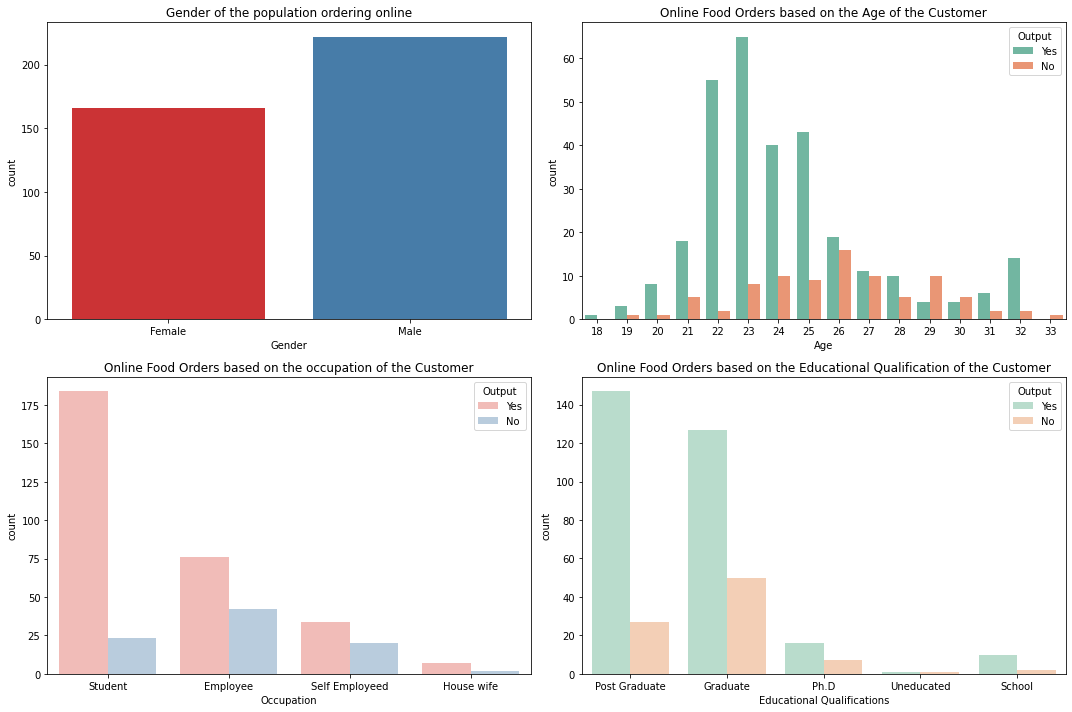

In [11]:
import matplotlib.pyplot as plt
df=pd.read_csv("onlinedeliverydata.csv")
fig, ax = plt.subplots(2,2, figsize=(15,10))

#this plot shows that men order more than women
ax[0][0].set_title('Gender of the population ordering online')
sns.countplot(x='Gender',palette="Set1" ,data=df, ax=ax[0][0])

#This plot shows that people of age 23 order food online the most, followed by ages 22 and 25
ax[0][1].set_title("Online Food Orders based on the Age of the Customer")
sns.countplot(x='Age',data=df,hue='Output',palette="Set2", ax=ax[0][1]);

#This plot shows that students order food online the most
ax[1][0].set_title("Online Food Orders based on the occupation of the Customer")
sns.countplot(x='Occupation',data=df,hue='Output',palette="Pastel1", ax=ax[1][0]);

#This plot shows that students order food online the most
ax[1][1].set_title("Online Food Orders based on the Educational Qualification of the Customer")
sns.countplot(x='Educational Qualifications',data=df,hue='Output',palette="Pastel2", ax=ax[1][1]);

plt.tight_layout()

(-1.1155221983787365,
 1.1007391523037493,
 -1.1098734172849043,
 1.1139403092399829)

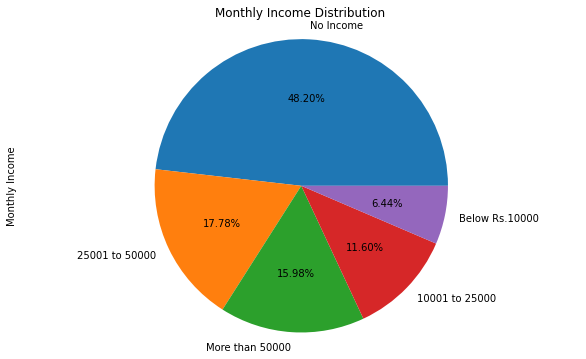

In [12]:
#Pie chart for 'monthly income' column
df=pd.read_csv("onlinedeliverydata.csv")
df['Monthly Income'].value_counts().sort_values(ascending=False).head(10)
df['Monthly Income'].value_counts().sort_values(ascending=False).head(10).plot(kind='pie',figsize=(10,6), 
title="Monthly Income Distribution", autopct='%1.2f%%')
plt.axis('equal')

It can be observed from the above pie chart that people with no monthly income order the most.

## Consumer preferences analysis

C:\Users\shuva\AppData\Local\Temp\ipykernel_14264\3073344118.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1][0].set_xticklabels(ax[1][0].get_xticklabels(), rotation=15)


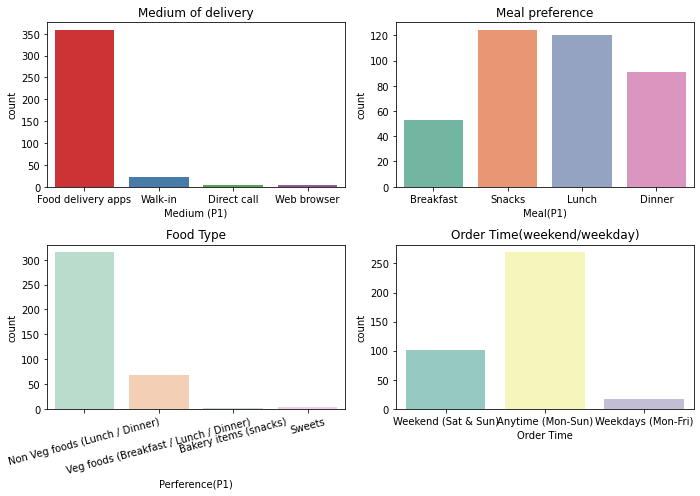

In [13]:
fig, ax = plt.subplots(2,2, figsize=(10,7))

#this plot shows that men order more than women
ax[0][0].set_title('Medium of delivery')
sns.countplot(x='Medium (P1)',palette="Set1" ,data=df, ax=ax[0][0])

#This plot shows that people of age 23 order food online the most, followed by ages 22 and 25
ax[0][1].set_title("Meal preference")
sns.countplot(x='Meal(P1)',data=df,palette="Set2", ax=ax[0][1]);

#This plot shows that students order food online the most
ax[1][0].set_title("Food Type")
ax[1][0].set_xticklabels(ax[1][0].get_xticklabels(), rotation=15)
sns.countplot(x='Perference(P1)',data=df,palette="Pastel2", ax=ax[1][0]);

#This plot shows that students order food online the most
ax[1][1].set_title("Order Time(weekend/weekday)")
sns.countplot(x='Order Time',data=df,palette="Set3", ax=ax[1][1]);

plt.tight_layout()

## Factors influencing next order

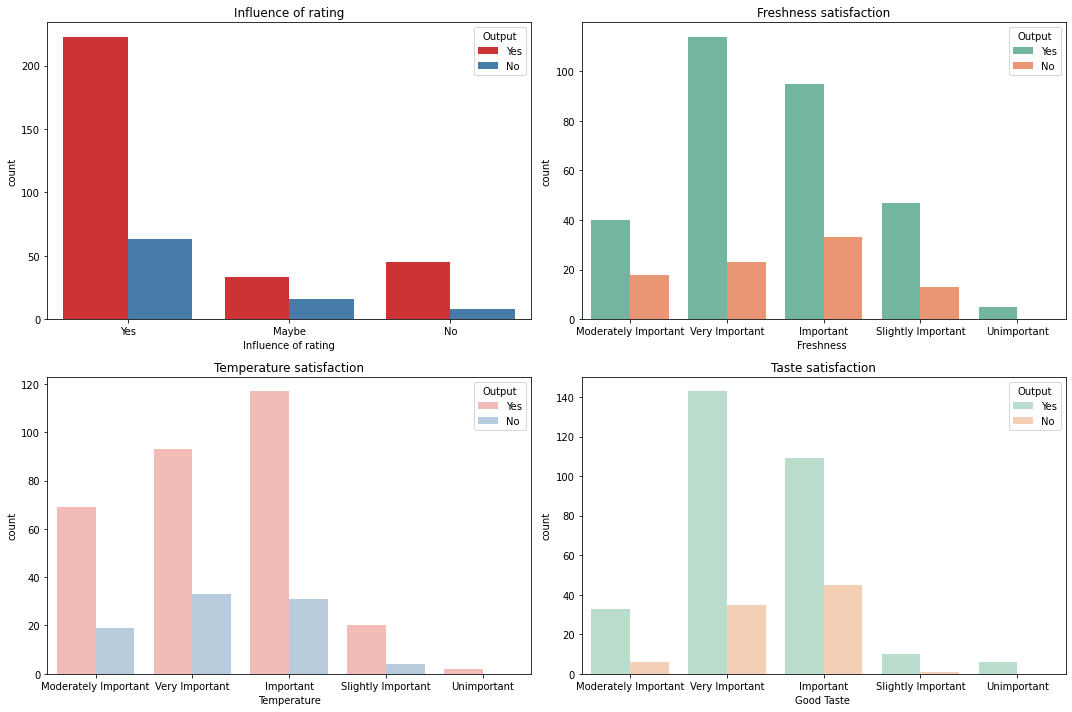

In [14]:
df=pd.read_csv("onlinedeliverydata.csv")
# plt.figure(figsize=(6,4))
fig, ax = plt.subplots(2,2, figsize=(15,10))


ax[0][0].set_title('Influence of rating')
sns.countplot(x='Influence of rating',hue='Output',palette="Set1" ,data=df, ax=ax[0][0])
# plt.show()

ax[0][1].set_title("Freshness satisfaction")
sns.countplot(x='Freshness ',data=df,hue='Output',palette="Set2", ax=ax[0][1]);

ax[1][0].set_title("Temperature satisfaction")
sns.countplot(x='Temperature',data=df,hue='Output',palette="Pastel1", ax=ax[1][0]);

ax[1][1].set_title("Taste satisfaction")
sns.countplot(x='Good Taste ',data=df,hue='Output',palette="Pastel2", ax=ax[1][1]);

plt.tight_layout()

In [15]:
#Converting categorical values into numerical values
data = df
data["Gender"] = data["Gender"].map({"Male": 1, "Female": 0})
data["Marital Status"] = data["Marital Status"].map({"Married": 2, 
                                                     "Single": 1, 
                                                     "Prefer not to say": 0})

data["Occupation"] = data["Occupation"].map({"Student": 1, 
                                             "Employee": 2, 
                                             "Self Employeed": 3, 
                                             "House wife": 4})
data["Educational Qualifications"] = data["Educational Qualifications"].map({"Graduate": 1, 
                                                                             "Post Graduate": 2, 
                                                                             "Ph.D": 3, "School": 4, 
                                                                             "Uneducated": 5})
data["Monthly Income"] = data["Monthly Income"].map({"No Income": 0, 
                                                     "25001 to 50000": 5000, 
                                                     "More than 50000": 7000, 
                                                     "10001 to 25000": 25000, 
                                                     "Below Rs.10000": 10000})
print(data.head())


   Age  Gender  Marital Status  Occupation  Monthly Income  \
0   20       0               1           1               0   
1   24       0               1           1           10000   
2   22       1               1           1           10000   
3   22       0               1           1               0   
4   22       1               1           1           10000   

   Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                           2            4   12.9766    77.5993    560001   
1                           1            3   12.9770    77.5773    560009   
2                           2            3   12.9551    77.6593    560017   
3                           1            6   12.9473    77.5616    560019   
4                           2            4   12.9850    77.5533    560010   

   ...    Less Delivery time High Quality of package       Number of calls  \
0  ...  Moderately Important    Moderately Important  Moderately Important   
1  ...  

In [16]:
#converting feedback/preference columns into numerical
for i in range(16,36):
    colname=data.columns[i]
    data[colname]= data[colname].map({ "Strongly agree": 0,"Agree": 1,"Neutral": 2, "Disagree": 3,"Strongly disagree": 4})
    print(data[colname])
print(data)

0      2
1      0
2      0
3      1
4      1
      ..
383    1
384    2
385    1
386    0
387    1
Name: Ease and convenient, Length: 388, dtype: int64
0      2
1      0
2      0
3      1
4      1
      ..
383    1
384    2
385    1
386    0
387    2
Name: Time saving, Length: 388, dtype: int64
0      2
1      0
2      0
3      0
4      1
      ..
383    0
384    2
385    1
386    0
387    1
Name: More restaurant choices, Length: 388, dtype: int64
0      2
1      0
2      2
3      1
4      1
      ..
383    1
384    2
385    1
386    0
387    1
Name: Easy Payment option, Length: 388, dtype: int64
0      2
1      0
2      2
3      0
4      1
      ..
383    1
384    2
385    1
386    1
387    1
Name: More Offers and Discount, Length: 388, dtype: int64
0      2
1      2
2      3
3      1
4      2
      ..
383    2
384    2
385    2
386    1
387    3
Name: Good Food quality, Length: 388, dtype: int64
0      2
1      1
2      2
3      1
4      2
      ..
383    1
384    2
385    1
386    0

In [17]:
#converting 'output' column to numerical values
data["Output"] = data["Output"].map({"Yes": 0, "No": 1})

#storing changes into a new file
data.to_csv('new1.csv', encoding='utf-8')

## Correlation Analysis

Correlation plot for the numerical columns

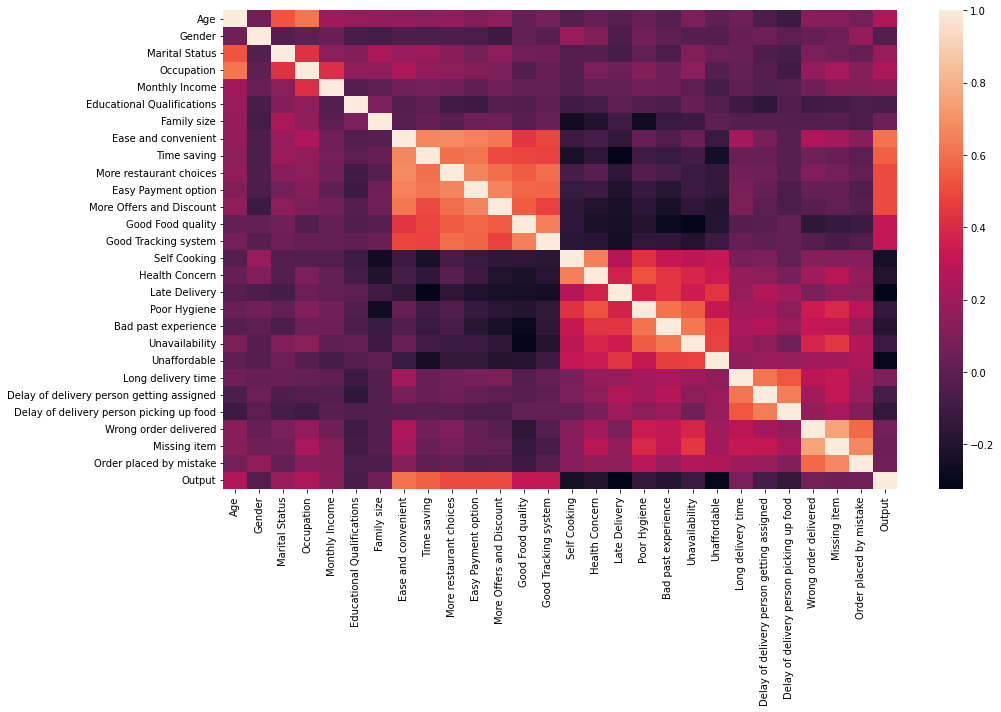

In [18]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
newdata=pd.read_csv("new1.csv")
newdf=newdata.drop(labels=['Unnamed: 0','latitude', 'longitude', 'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)', 'Perference(P1)', 'Perference(P2)'], axis=1)
plt.figure(figsize=(15,10))
sns.heatmap(newdf.corr('pearson'))
plt.tight_layout()

From this correlation plot it is observed that the 'output' column (whether the customer will order again) has positive correlation with 'Ease and convenient', 'Time saving', 'More restaurant choices', 'Easy Payment option' columns and negative correlation with 'Self Cooking', 'Health Concern', 'Late Delivery' and 'Poor Hygiene'.

In [19]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
newdata =  pd.read_csv('new1.csv')
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

#initializing the relevant attributes for training
x = np.array(newdata[["Age", "Gender", "Marital Status", "Occupation", 
                   "Monthly Income", "Educational Qualifications", 
                   "Family size",'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake']])
y = np.array(newdata[["Output"]])
print(x)
print(y)

[[20  0  1 ...  1  1  1]
 [24  0  1 ...  0  0  0]
 [22  1  1 ...  0  1  2]
 ...
 [22  0  1 ...  0  0  0]
 [23  1  1 ...  0  0  3]
 [23  1  1 ...  3  4  4]]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]

## Feature importance

In [22]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [23]:
#assigning train and test values

from sklearn.ensemble import RandomForestClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.4, random_state=0)

In [24]:
# Training / Test Dataframe

colname=['Age', 'Gender', 'Marital Status', 'Occupation', 
                   'Monthly Income', 'Educational Qualifications', 
                   'Family size','Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake']


In [25]:
# Create a random forest classifier
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
forest.fit(xtrain, ytrain)

# Print the name and gini importance of each feature
for feature in zip(colname, forest.feature_importances_):
    print(feature)

C:\Users\shuva\AppData\Local\Temp\ipykernel_14264\387019229.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(xtrain, ytrain)


('Age', 0.05134552542481424)
('Gender', 0.011040679574504112)
('Marital Status', 0.014854692328852425)
('Occupation', 0.01825238678377204)
('Monthly Income', 0.018859376193558295)
('Educational Qualifications', 0.015228604549826991)
('Family size', 0.021578686976915243)
('Ease and convenient', 0.1072769428345094)
('Time saving', 0.10761342154450065)
('More restaurant choices', 0.10311642237440814)
('Easy Payment option', 0.053726569878900156)
('More Offers and Discount', 0.054294203916441276)
('Good Food quality', 0.02185563343576915)
('Good Tracking system', 0.041887861766606804)
('Self Cooking', 0.026139706782798526)
('Health Concern', 0.018923594000743352)
('Late Delivery', 0.05605752261081758)
('Poor Hygiene', 0.01679836345584045)
('Bad past experience', 0.02749652596503021)
('Unavailability', 0.01959040686501119)
('Unaffordable', 0.08195356442219132)
('Long delivery time', 0.01785816245098405)
('Delay of delivery person getting assigned', 0.021886970339743496)
('Delay of delivery 

In [26]:
# Sort the feature importance in descending order

importances = forest.feature_importances_
indices = np.argsort(importances)

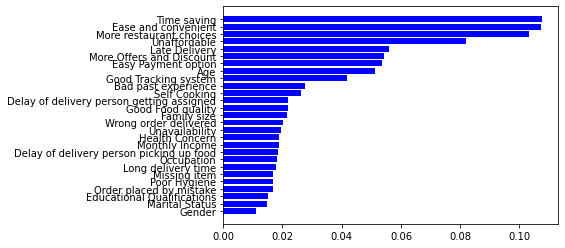

In [27]:
plt.figure(1)
plt.barh(range(len(indices)), importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),[colname[i] for i in indices])
plt.show()

In [28]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(forest, threshold=0.06)

# Train the selector
sfm.fit(xtrain, ytrain)

G:\Software-Applications\Python_3.10\lib\site-packages\sklearn\feature_selection\_from_model.py:355: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestClassifier(n_estimators=10000, n_jobs=-1,
                                                 random_state=0),
                threshold=0.06)

In [29]:
for feature_list_index in sfm.get_support(indices=True):
    print(colname[feature_list_index])

Ease and convenient
Time saving
More restaurant choices
Unaffordable


In [30]:
#accuracy score for feature selection using random forest
print(forest.score(xtest, ytest))

0.9551282051282052


In [31]:
#accuracy metrics for random forest feature selection
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
log_pred = forest.predict(xtest)

print(classification_report(ytest, log_pred))
print(confusion_matrix(ytest, log_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       119
           1       0.97      0.84      0.90        37

    accuracy                           0.96       156
   macro avg       0.96      0.91      0.93       156
weighted avg       0.96      0.96      0.95       156

[[118   1]
 [  6  31]]


## Models

1) Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [33]:
#creating training data with only the relevant attributes obtained from feature selection
x = np.array(newdata[['Time saving', 'More restaurant choices', 'Ease and convenient', 'Unaffordable']])
y = np.array(newdata[["Output"]])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) # 80% training and 20% test

dtree = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtree = dtree.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dtree.predict(X_test)

In [34]:
# accuracy of decision tree prediction
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8846153846153846


In [37]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
log_pred = dtree.predict(X_test)

print(classification_report(y_test, log_pred))
print(confusion_matrix(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        65
           1       0.61      0.85      0.71        13

    accuracy                           0.88        78
   macro avg       0.79      0.87      0.82        78
weighted avg       0.91      0.88      0.89        78

[[58  7]
 [ 2 11]]


2) Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
# splitting test & train data:
from sklearn.ensemble import RandomForestClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.40,random_state=388)

# random forest classifier:
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9102564102564102


C:\Users\shuva\AppData\Local\Temp\ipykernel_14264\420607359.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain, ytrain)


In [40]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
log_pred = model.predict(xtest)

print(classification_report(ytest, log_pred))
print(confusion_matrix(ytest, log_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       116
           1       0.86      0.78      0.82        40

    accuracy                           0.91       156
   macro avg       0.89      0.87      0.88       156
weighted avg       0.91      0.91      0.91       156

[[111   5]
 [  9  31]]


3) Decision tree (with pruning)

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10, min_samples_leaf=4,
                       splitter='random')
[Text(0.5294117647058824, 0.9, '[0 0 0 1] <= 2.03\ngini = 0.323\nsamples = 232\nvalue = [185, 47]'), Text(0.29411764705882354, 0.7, '[1 0 1 2] <= 2.384\ngini = 0.158\nsamples = 196\nvalue = [179, 17]'), Text(0.17647058823529413, 0.5, '[0 0 0 0] <= 2.134\ngini = 0.284\nsamples = 70\nvalue = [58, 12]'), Text(0.11764705882352941, 0.3, '[1 0 1 2] <= 1.972\ngini = 0.219\nsamples = 64\nvalue = [56, 8]'), Text(0.058823529411764705, 0.1, 'gini = 0.375\nsamples = 32\nvalue = [24, 8]'), Text(0.17647058823529413, 0.1, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'), Text(0.23529411764705882, 0.3, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]'), Text(0.4117647058823529, 0.5, '[1 0 1 2] <= 3.19\ngini = 0.076\nsamples = 126\nvalue = [121, 5]'), Text(0.35294117647058826, 0.3, '[2 2 2 2] <= 2.554\ngini = 0.12\nsamples = 78\nvalue = [73, 5]'), Text(0.29411764705882354, 0.1, 'gini = 0.053\nsamp

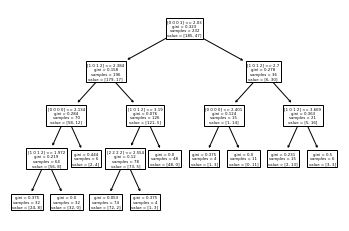

In [42]:
dtree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
             random_state=None, splitter='random')
# We have pruned the tree to prevent overfitting to 5 leaves & depth ONLY. based in gini index & it's being built only on attributes 'Time saving', 'More restaurant choices' . 
dtree = dtree.fit(xtrain, ytrain)
print(dtree)
# the above line is used to disp. all values which can be found below

#the tree with req. info.
print(tree.plot_tree(dtree, feature_names=x))


In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [44]:
print(confusion_matrix(dtree.predict(x),y))
#confusion_matrix(x, y)

[[291  26]
 [ 10  61]]


In [45]:
accuracy_score(dtree.predict(x),y)*100

90.72164948453609

In [46]:
print(classification_report(dtree.predict(x),y))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       317
           1       0.70      0.86      0.77        71

    accuracy                           0.91       388
   macro avg       0.83      0.89      0.86       388
weighted avg       0.92      0.91      0.91       388



4) Churn analysis 

In [47]:
!pip install datacleaner

In [48]:
import  datacleaner as dc
df = pd.read_csv("onlinedeliverydata.csv")
data_dummy = dc.autoclean(df.copy())

# We plan to drop attributes which currently can't help us train our models....
# we can only use them to identify the regions which runs the online business in BLR region ONLY. 
data_dummy.drop(['latitude', 'longitude', 'Pin code', 'Reviews'], axis=1, inplace=True)

In [49]:
data_dummy.to_csv("new.csv")
# writing to the .csv file for future analysis

In [50]:
from sklearn import metrics
from sklearn.metrics import auc, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, f1_score

In [51]:
dataset = pd.read_csv("new.csv")

In [52]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [53]:
#Feature scaling
X = dataset.drop(["Output"],axis=1)
y = dataset["Output"]

sc = StandardScaler()
X[X.columns[:]] = sc.fit_transform(X[X.columns[:]])
X.head()

,Unnamed: 0,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Medium (P1),Medium (P2),...,Delivery person ability,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity
0,-1.727592,-1.557620,-1.156438,0.657391,0.826756,0.863220,0.899506,0.532929,-0.190330,1.707278,...,0.571439,0.555797,0.064509,-0.395685,-0.395023,-0.392524,-0.535526,-0.387513,-0.552263,-0.553993
1,-1.718664,-0.211614,-1.156438,0.657391,0.826756,-0.479182,-1.034058,-0.208205,-0.190330,1.707278,...,-1.017940,0.555797,2.150303,1.342343,1.512889,1.371560,1.230344,1.360802,1.042858,1.058127
2,-1.709736,-0.884617,0.864724,0.657391,0.826756,-0.479182,0.899506,-0.208205,-0.190330,-0.840506,...,-1.017940,0.555797,-0.630755,1.342343,-0.395023,1.371560,1.230344,-0.970285,1.042858,-0.553993
3,-1.700808,-0.884617,-1.156438,0.657391,0.826756,0.863220,-1.034058,2.015198,-0.190330,0.433386,...,-1.017940,0.555797,2.150303,-0.975028,-0.395023,1.371560,1.230344,1.360802,1.042858,-1.091367
4,-1.691880,-0.884617,0.864724,0.657391,0.826756,-0.479182,0.899506,0.532929,3.020451,-0.840506,...,-1.017940,0.555797,-0.630755,-0.975028,-0.395023,-0.980552,-1.124149,-0.970285,1.042858,1.058127


In [54]:
#Train and Test split
train_x, test_x, train_y, test_y = train_test_split(X, y ,test_size  = 0.25, random_state=0, stratify=dataset.Output)
print("Train dataset shape: {0}, \nTest dataset shape: {1}".format(train_x.shape, test_x.shape))

Train dataset shape: (291, 51), 
Test dataset shape: (97, 51)


In [55]:
#Churn & not Churn:
#Churn: Non recurring customers
baseline_pred = [0]*len(test_y)
baseline_proba = [0]*len(test_y)

baseline_accuracy = round(metrics.accuracy_score(test_y, baseline_pred) * 100, 2)
baseline_ROC_auc = roc_auc_score(test_y, baseline_proba)

fpr_bs, tpr_bs, threshold_bs = roc_curve(test_y, baseline_proba)
precision_bs, recall_bs, thres_bs = precision_recall_curve(test_y, baseline_proba)

auc_score_bs = auc(recall_bs, precision_bs)
baseline_F1 = f1_score(test_y, baseline_pred)


#Brier Score 
'''
Def. :the mean squared distance between the observed and expected outcomes.
'''
Brier_bs = pow((baseline_proba-test_y),2).sum()/len(test_y)

# Justifiying the accuracy of our churn & not churn model.
confusion_matrix(test_y,baseline_pred)

array([[22,  0],
       [75,  0]], dtype=int64)

In [56]:
print(Brier_bs)

0.7731958762886598
